# Feature Selection using D-Trees
Feature selection is implicit in the construction of decision trees as, typically not all features will appear in the tree.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 

In [2]:
penguins_df = pd.read_csv('penguins.csv', index_col = 0)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


In [3]:
penguins_df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Load the data into numpy arrays and divide into train and test sets.  
The filters are *trained* using the training data and then a classifier is trained on the feature subset and tested on the test set.  
With D-Trees there is no need to scale the data.

In [4]:
y = penguins_df.pop('species').values
X = penguins_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       random_state=1, test_size=1/2)
feature_names = penguins_df.columns
X_train.shape, X_test.shape

((166, 4), (167, 4))

## Full Tree  
Tree with no pruning

In [5]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.93


[Text(0.6, 0.9, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.7, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.3, 0.5, 'bill_depth <= 16.65\n75\n[74, 1, 0]\nAdelie'),
 Text(0.2, 0.3, 'bill_length <= 39.5\n8\n[7, 1, 0]\nAdelie'),
 Text(0.1, 0.1, '7\n[7, 0, 0]\nAdelie'),
 Text(0.3, 0.1, '1\n[0, 1, 0]\nGentoo'),
 Text(0.4, 0.3, '67\n[67, 0, 0]\nAdelie'),
 Text(0.5, 0.5, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.7, 'bill_depth <= 18.4\n63\n[0, 5, 58]\nChinstrap'),
 Text(0.7, 0.5, '58\n[0, 0, 58]\nChinstrap'),
 Text(0.9, 0.5, '5\n[0, 5, 0]\nGentoo')]

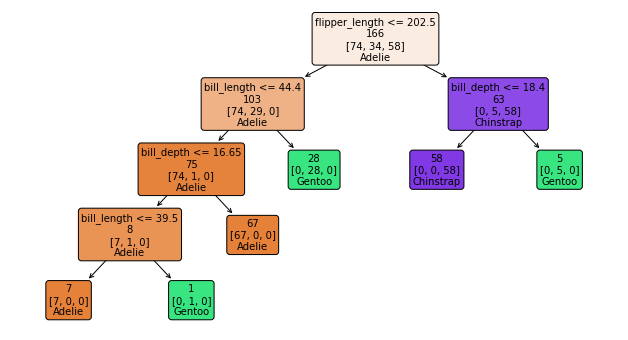

In [6]:
plt.figure(figsize=(11,6))

tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
                      class_names=['Adelie','Gentoo', 'Chinstrap'], 
                      label = 'none', filled=True, impurity = False,
               rounded=True) 

In [7]:
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi,feature_names):
    print(" %4.2f  %s" % (fi_val, f_name))

 0.34  bill_length
 0.11  bill_depth
 0.55  flipper_length
 0.00  body_mass


How many leaves in this tree?

In [8]:
ftree.get_n_leaves()

6

### Pruned Tree
Ok, build a tree with just 3 leaves.

In [9]:
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.89


[Text(0.6, 0.8333333333333334, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.2, 0.16666666666666666, '75\n[74, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.5, '63\n[0, 5, 58]\nChinstrap')]

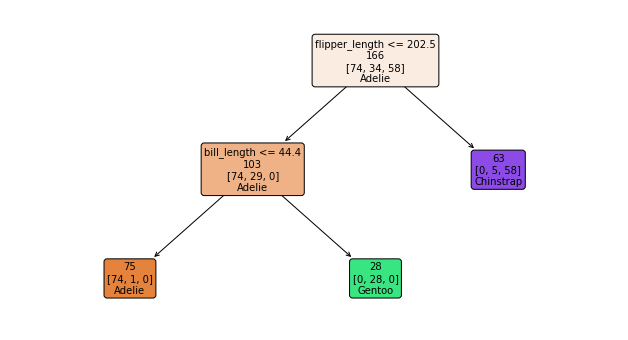

In [10]:
plt.figure(figsize=(11,6))

tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
                      class_names=['Adelie','Gentoo', 'Chinstrap'], 
                      label = 'none', filled=True, impurity = False,
               rounded=True) 

Now two of the features are not selected. 

In [11]:
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi,feature_names):
    print(" %4.2f  %s" % (fi_val, f_name))

 0.37  bill_length
 0.00  bill_depth
 0.63  flipper_length
 0.00  body_mass
